#### Standard Ensemble Learning Strategies

Ensemble learning refers to algorithms that combine the predictions from two or more models.

1. Bagging

2. Stacking

3. Boosting

### Bagging and Boosting are for Supervised ML, NOT for Unsupervised ML algorithms.

### Bagging  AND Cross - Validation

Boostrap aggregating (Bagging) and Boosting are ensemble ML techniques, where a set of weak learners are combined to create a stronger learner to obtain better performance than a single one.

Cross Validation is a model validation technique, its main purpose is measuring the performance of a model.


Bootstrap resamples with replacement.

Cross validation resamples without replacement and thus produces surrogate data sets that are smaller than the orginal one. 

#### Bagging

Bootstrap aggregation, or bagging in short, is an ensemble learning method that seeks a diverse group of ensemble memebers by varying the training data.

Boostrap refers to random sampling with replacement. So, boostrap is a sampling technique.

Bagging helps to reduce the model's variance --> deal with over-fitting problems.

The training stage is parallel and independent. Each model receives equal weight.

--Extended to ---> Random Forest

#### Stacking

Stacked Generalization, or stacking for short, is an ensemble method that seeks a diverse group of members by varying the model types fit on the training data and using a model to combine predictions.

Diversity comes from the different machine learning models used as ensemble members.

#### Boosting

Boosting is an ensemble method that seeks to change the training data to focus attention on examples that previous fit models on the training dataset have gotten wrong.

The key property of boosting ensembles is the idea of correcting prediction errors. 

The idea of combining many weak learners into strong learners.

Boosting helps to reduce the model's bias.

Boosting builds the new learner in a sequential way. Misclassified data increases its weights to emphasise the most difficult cases.

--Extended to --> Gradient Boosting

## Bagging

We will use the diabetes dataset to predict if a person has diabetes or not. 

The collected dataset has Age and blood pressure features, which help the model determine if the person has diabetes.

In [11]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# check missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
# split the data into X and Y
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]

(768,)

In [28]:
# Preprocessing: Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [42]:
# split the dataset into training and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scale,y, test_size = 0.2)


In [43]:
# Here, we use the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier()

# k fold validation, where k = 5
scores = cross_val_score(dt,X,y, cv = 5)
print("scores:", scores)

import numpy as np
print("mean of scores: ", np.mean(scores))

scores: [0.70779221 0.68181818 0.66883117 0.79738562 0.7124183 ]
mean of scores:  0.7136490960020371


In [45]:
# Implementing the Bagging algorithms
from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier( base_estimator = dt, n_estimators = 100,
                             max_samples = 0.8, bootstrap = True, oob_score=True,random_state = 0)

# n_estimators: the number of base estimators in the ensemble
# max_sampels: the number of samples used to train each base estimators. int: the number; float: the proportion
# max_features: the number of features used to train in each base estimator
# bootstrap: whether smapels are drawn with replacement. True: with
# oob_score: whether to use out-of-bag samples to estimate the generalization error

bag_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [46]:
# score
bag_model.oob_score_

0.7687296416938111

compared with the previous mean of scores:  0.7136490960020371, we have a slight increase 

In [48]:
# we can also check the score using the test data
bag_model.score(X_test, y_test)

0.7142857142857143

Also slight increases

### Random Forest -- An extended Bagging algorithm

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100)

# k fold, where k = 5
scores = cross_val_score(rf, X, y, cv = 5)
scores.mean()

0.7748068924539513

The accuracy score is high, showing that the bagging algorithms increase the model accuracy score. It also prevents model overfitting.

## Boosting 

### 1. Gradient Boosting Classifier

create a model that predicts which passengers survived the Titanic shipwreck.

In [61]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
y_train = train_data["Survived"]
train_data.drop(labels="Survived", axis=1, inplace=True)

train_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
full_data = train_data.append(test_data)

full_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
drop_columns = ["Name", "Age", "SibSp", "Ticket", "Cabin", "Parch", "Embarked"]
full_data.drop(labels=drop_columns, axis=1, inplace=True)

full_data.head()

,PassengerId,Pclass,Sex,Fare
0,1,3,male,7.2500
1,2,1,female,71.2833
2,3,3,female,7.9250
3,4,1,female,53.1000
4,5,3,male,8.0500


In [66]:
full_data = pd.get_dummies(full_data, columns=["Sex"])
full_data.fillna(value=0.0, inplace=True)

full_data.head()

,PassengerId,Pclass,Fare,Sex_female,Sex_male
0,1,3,7.2500,0,1
1,2,1,71.2833,1,0
2,3,3,7.9250,1,0
3,4,1,53.1000,1,0
4,5,3,8.0500,0,1


In [67]:
X_train = full_data.values[0:891]
X_test = full_data.values[891:]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=0.3, random_state=12)

Now we can try setting different learning rates, so that we can compare the performance of the classifier's performance at different learning rates.

In [72]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate, "Accuracy score (training):",np.round(gb_clf.score(X_train, y_train),2),
         "Accuracy score (validation)", np.round(gb_clf.score(X_val, y_val),2))

Learning rate:  0.05 Accuracy score (training): 0.8 Accuracy score (validation) 0.73
Learning rate:  0.075 Accuracy score (training): 0.81 Accuracy score (validation) 0.73
Learning rate:  0.1 Accuracy score (training): 0.81 Accuracy score (validation) 0.72
Learning rate:  0.25 Accuracy score (training): 0.83 Accuracy score (validation) 0.75
Learning rate:  0.5 Accuracy score (training): 0.86 Accuracy score (validation) 0.77
Learning rate:  0.75 Accuracy score (training): 0.87 Accuracy score (validation) 0.75
Learning rate:  1 Accuracy score (training): 0.87 Accuracy score (validation) 0.74


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.5 gives us the best performance on the validation set and good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. Let's create a new classifier and specify the best learning rate we discovered.

Confusion Matrix:
[[142  19]
 [ 42  65]]


<AxesSubplot:>

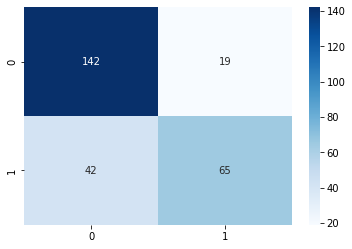

In [87]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)

predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

# visualization of the confusion matrix
cm = confusion_matrix(y_val, predictions)

import seaborn as sns

sns.heatmap(cm,cmap='Blues', annot=True,fmt='g' )
# fmt ='g': show integer

In [88]:
print("Classification Report")
print(classification_report(y_val, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       161
           1       0.77      0.61      0.68       107

    accuracy                           0.77       268
   macro avg       0.77      0.74      0.75       268
weighted avg       0.77      0.77      0.77       268



### 2. XGBoosting

In [97]:
df = pd.read_csv('diabetes.csv')
df.head()

X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [100]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGBRegressor(objective='reg:squarederror'), X, y, scoring='neg_mean_squared_error')

scores

array([-0.19508962, -0.23561564, -0.17407114, -0.14495694, -0.20084335])

In [102]:
# To find the root mean squared error, just take the negative square root of the five scores.

(-scores) ** 0.5

array([0.44168951, 0.48540256, 0.41721834, 0.38073211, 0.4481555 ])